In [95]:
# Import necessary libraries
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load pre-trained Word2Vec model
model = api.load('glove-wiki-gigaword-50')

def get_word_embeddings(words):
    """ Get vector embeddings for the given list of words. """
    return {word: model[word] for word in words if word in model}

def reduce_dimensions(embeddings):
    """ Reduce dimensions of the embeddings to 2D using PCA. """
    pca = PCA(n_components=2)
    vectors = list(embeddings.values())
    reduced_vectors = pca.fit_transform(vectors)
    return {word: reduced_vectors[i] for i, word in enumerate(embeddings)}

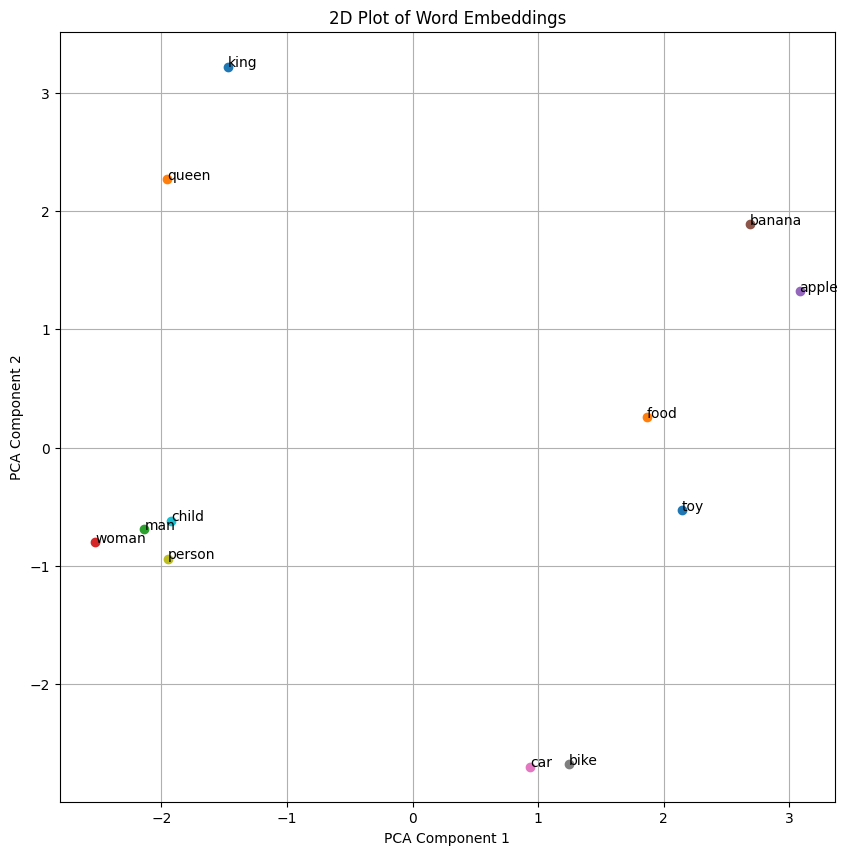

In [96]:
def plot_embeddings(*words):
    """
    Function to plot word embeddings for a given set of words.
    It gets the embeddings, reduces their dimensions, and plots them.
    """
    embeddings = get_word_embeddings(words)
    reduced_embeddings = reduce_dimensions(embeddings)

    plt.figure(figsize=(10, 10))
    for word, (x, y) in reduced_embeddings.items():
        plt.scatter(x, y)
        plt.text(x, y, word)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('2D Plot of Word Embeddings')
    plt.grid(True)
    plt.show()

# Example usage
plot_embeddings("king", "queen", "man", "woman", "apple", "banana", "car", "bike", "person", "child", "toy", "ice cream", "food")

In [98]:
def analogy(word1, word2, word3):
    """
    Finds a word that completes the analogy: word1 is to word2 as word3 is to ?
    Prints the result.
    """
    try:
        result = model.most_similar(positive=[word2, word3], negative=[word1])
        print(f"Analogy: {word1} is to {word2} as {word3} is to {result[0][0]}")
    except KeyError as e:
        print(f"Error: {str(e)}")

def doesnt_match(words):
    """
    Identifies which word from a list doesn't belong with the others.
    Prints the result.
    """
    try:
        result = model.doesnt_match(words.split())
        print(f"Doesn't Match: In '{words}', '{result}' doesn't match")
    except KeyError as e:
        print(f"Error: {str(e)}")

def most_similar(word, top_n=5):
    """
    Finds the top N most similar words to the given word.
    Prints the result.
    """
    try:
        similar_words = model.most_similar(word, topn=top_n)
        similar_words_str = ', '.join([word for word, similarity in similar_words])
        print(f"Most Similar to '{word}': {similar_words_str}")
    except KeyError as e:
        print(f"Error: {str(e)}")

# Example usage:
analogy('man', 'king', 'woman')
doesnt_match("breakfast cereal dinner lunch")
most_similar('king')

Analogy: man is to king as woman is to queen
Doesn't Match: In 'breakfast cereal dinner lunch', 'cereal' doesn't match
Most Similar to 'king': prince, queen, ii, emperor, son


In [99]:
def add_and_subtract(words_add, words_subtract):
    """
    Performs vector subtraction and addition on word embeddings.
    For example, it can calculate "king" - "man" + "woman" = "queen".
    Prints the result.
    """
    try:
        result = model.most_similar(positive=words_add, negative=words_subtract)
        print("Add and subtract:", ' + '.join(words_add), '-', ' - '.join(words_subtract), '=', result[0][0])
    except KeyError as e:
        print(f"Error: {str(e)}")

# Example usage:
add_and_subtract(["woman", "king"], ["man"])

Add and subtract: woman + king - man = queen


In [100]:
def add_words(word1, word2):
    """
    Performs vector addition on word embeddings.
    Given two words, it adds their vectors and finds a word whose
    embedding is most similar to this resultant vector.
    Prints the result.
    """
    try:
        result = model.most_similar(positive=[word1, word2])
        print("Add Words:", word1, '+', word2, '=', result[0][0])
    except KeyError as e:
        print(f"Error: {str(e)}")

# Example usage:
add_words('one', 'one')

Add Words: one + one = another


In [101]:
def word_similarity_game(main_word, *options):
    """
    A word similarity guessing game.
    Presents a main word and three options, and the user has to guess which option is most similar to the main word.

    """
    if len(options) != 3:
        print("Please provide exactly three options for the game.")
        return

    print(f"Guess which word is most similar to '{main_word}': {options}")
    guess = input("Enter your guess: ")

    if guess not in options:
        print("Invalid guess. Please choose one of the provided options.")
        return

    # Find the most similar word among the options
    most_similar_word = max(options, key=lambda option: model.similarity(main_word, option) if option in model else -1)

    if guess == most_similar_word:
        print("Correct! You guessed the right word.")
    else:
        print(f"Wrong! The word most similar to '{main_word}' is '{most_similar_word}'.")

# Example usage
word_similarity_game("apple", "banana", "car", "house")


Guess which word is most similar to 'apple': ('banana', 'car', 'house')
Enter your guess: banana
Correct! You guessed the right word.


In [102]:
def sentiment_analyzer(phrase, *sentiments):
    """
    Analyzes the sentiment of a phrase and compares it with a list of sentiment words.
    Determines which sentiment word has the highest average similarity to the words in the phrase.

    Parameters:
    phrase (str): The phrase whose sentiment is to be analyzed.
    sentiments (str): Variable number of sentiment words.

    Prints:
    The sentiment word that has the highest average similarity to the phrase.
    """
    words = phrase.split()
    valid_words = [word for word in words if word in model]

    if not valid_words:
        print("No words from the phrase are in the model's vocabulary.")
        return

    # Calculate the average similarity of each sentiment word to the words in the phrase
    best_sentiment = None
    highest_avg_similarity = -1

    for sentiment in sentiments:
        if sentiment in model:
            total_similarity = sum(model.similarity(word, sentiment) for word in valid_words)
            avg_similarity = total_similarity / len(valid_words)
            if avg_similarity > highest_avg_similarity:
                highest_avg_similarity = avg_similarity
                best_sentiment = sentiment

    if best_sentiment:
        print(f"Sentiment of the phrase '{phrase}' is closest to '{best_sentiment}'")
    else:
        print("No matching sentiment found.")

# Example usage:
sentiment_analyzer("I feel sad", "positive", "negative")
sentiment_analyzer("I feel happy", "positive", "negative")
sentiment_analyzer("furry little dog", "puppy", "darkness", "cheese")
sentiment_analyzer("swiss on cracker", "puppy", "darkness", "cheese")
sentiment_analyzer("cave diving", "puppy", "darkness", "cheese")

Sentiment of the phrase 'I feel sad' is closest to 'negative'
Sentiment of the phrase 'I feel happy' is closest to 'positive'
Sentiment of the phrase 'furry little dog' is closest to 'puppy'
Sentiment of the phrase 'swiss on cracker' is closest to 'cheese'
Sentiment of the phrase 'cave diving' is closest to 'darkness'


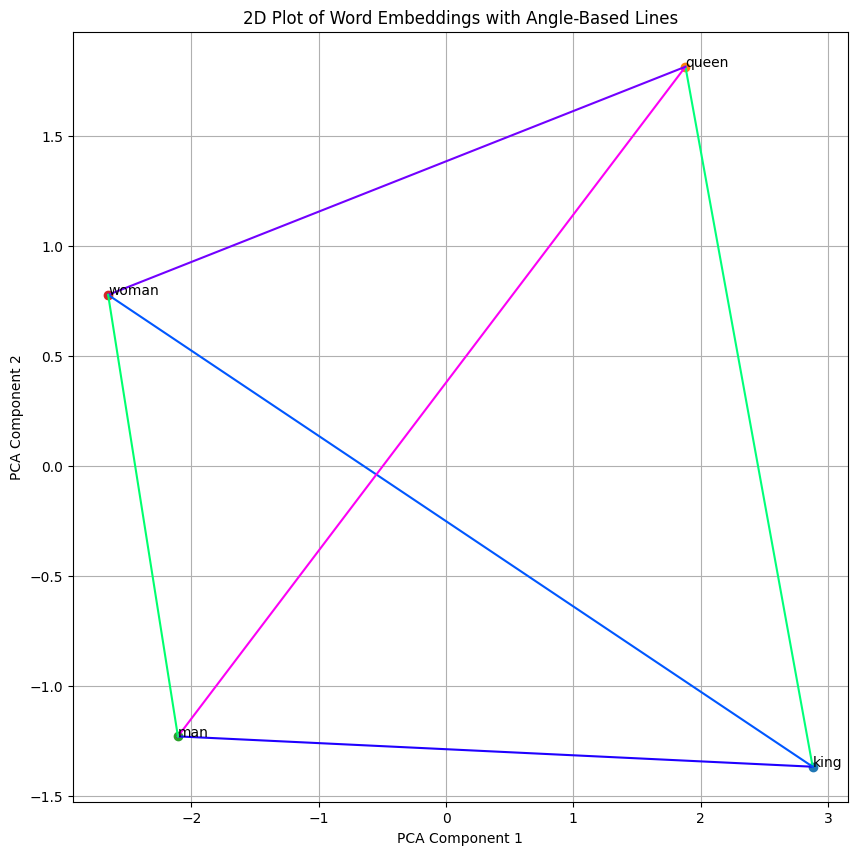

In [93]:
import matplotlib.pyplot as plt
import matplotlib

def calculate_angle(point1, point2):
    """ Calculate the polar angle between two points. """
    delta_y = point2[1] - point1[1]
    delta_x = point2[0] - point1[0]
    angle = np.arctan2(delta_y, delta_x)
    return np.degrees(angle) if angle >= 0 else np.degrees(angle) + 360

def plot_with_lines(*words):
    """
    Function to plot word embeddings with lines for a given set of words.
    It gets the embeddings, reduces their dimensions, and plots them.
    """
    embeddings = get_word_embeddings(words)
    reduced_embeddings = reduce_dimensions(embeddings)

    plt.figure(figsize=(10, 10))
    cmap = matplotlib.colormaps['hsv']

    for i, (word1, (x1, y1)) in enumerate(reduced_embeddings.items()):
        plt.scatter(x1, y1)
        plt.text(x1, y1, word1)
        for word2, (x2, y2) in list(reduced_embeddings.items())[i+1:]:
            angle = calculate_angle((x1, y1), (x2, y2))
            plt.plot([x1, x2], [y1, y2], color=cmap(int(angle % 360)))

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('2D Plot of Word Embeddings with Angle-Based Lines')
    plt.grid(True)
    plt.show()

# Example usage
plot_with_lines("king", "queen", "man", "woman")
